In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2

In [30]:
path = 'F:\works\polar//bianyaqi\day1\\junyun\group2_sanshe'
filename = '1.png'

#input 0,30,60,90
I0 = mpimg.imread(path+'/0/'+filename)
I30 = mpimg.imread(path+'/30/'+filename)
I60 = mpimg.imread(path+'/60/'+filename)
I90 = mpimg.imread(path+'/90/'+filename)
print(I0.shape)

(2048, 2048)


In [31]:
I01 = I0.reshape(1,2048*2048)
I301 = I30.reshape(1,2048*2048)
I601 = I60.reshape(1,2048*2048)
I901 = I90.reshape(1,2048*2048)

In [32]:
I = np.append(I01,I301,axis = 0)
I = np.append(I,I601,axis = 0)
I = np.append(I,I901,axis = 0)

In [33]:
print(I)

[[0.04313726 0.04705882 0.03137255 ... 0.05098039 0.0627451  0.05490196]
 [0.04705882 0.05098039 0.03529412 ... 0.05882353 0.05882353 0.05490196]
 [0.04705882 0.05882353 0.03921569 ... 0.05882353 0.05490196 0.05882353]
 [0.04313726 0.05098039 0.04313726 ... 0.0627451  0.05882353 0.05882353]]


In [34]:
t1 = 0/180*math.pi
t2 = 30/180*math.pi
t3 = 60/180*math.pi
t4 = 90/180*math.pi

In [35]:
X = np.mat([[np.cos(t1)**2,2*np.sin(t1)*np.cos(t1),1],
            [np.cos(t2)**2,2*np.sin(t2)*np.cos(t2),1],
            [np.cos(t3)**2,2*np.sin(t3)*np.cos(t3),1],
            [np.cos(t4)**2,2*np.sin(t4)*np.cos(t4),1]])
XX = np.dot(X.T,X)
a = np.dot(XX.I,X.T)

In [36]:
p1 = np.dot(a,I)
print(p1)
ai = p1[0,:]
bi = p1[1,:]
ci = p1[2,:]

[[ 1.87649462e-17 -6.27450943e-03 -1.09803915e-02 ... -9.41176713e-03
   4.70588505e-03 -4.70588207e-03]
 [ 4.52823714e-03  6.79235570e-03 -1.93198165e-18 ...  2.26411642e-03
  -4.52823929e-03 -5.94429731e-18]
 [ 4.31372561e-02  5.21568634e-02  4.27450992e-02 ...  6.15686309e-02
   5.84313732e-02  5.92156865e-02]]


In [37]:
ai = ai.reshape(2048,2048)
bi = bi.reshape(2048,2048)
ci = ci.reshape(2048,2048)

np.mat([np.cos(t1)*2，2*np.sin(t1)*np.cos(t1),1])

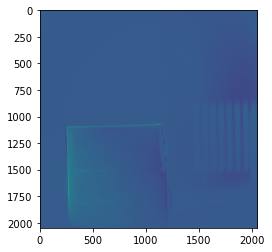

In [38]:
plt.imshow(bi)

In [39]:
ai = np.array(ai)
bi = np.array(bi)
ci = np.array(ci)

In [40]:
ILP = np.sqrt(ai**2+(2*bi)**2)
cet = 0.5*np.arccos(ai/(ILP+0.0001))
NILP = ci-ILP*(np.sin(cet)**2)

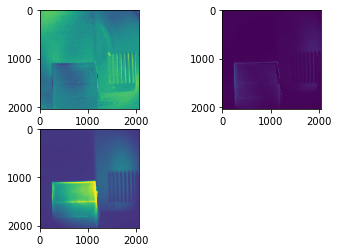

In [41]:
plt.subplot(2,2,1)
plt.imshow(cet)
plt.subplot(2,2,2)
plt.imshow(ILP)
plt.subplot(2,2,3)
plt.imshow(NILP)

<class 'numpy.ndarray'>


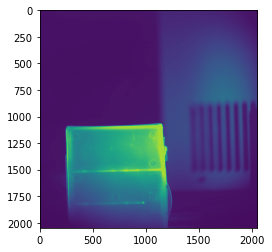

In [42]:
t = 50
t = t/180*math.pi
I = ILP*np.cos(t-cet)**2+NILP
plt.imshow(I)
print(type(I))

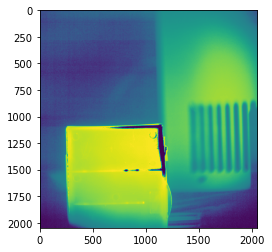

In [43]:
I11 = np.array(I*256,dtype='uint8')
plt.imshow(I11)
I12 = cv2.equalizeHist(I11)
plt.imshow(I12)

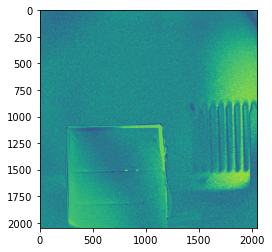

In [44]:
plt.imshow(cet)
I11 = np.array(cet*256,dtype='uint8')
plt.imshow(I11)
I12 = cv2.equalizeHist(I11)
plt.imshow(I12)

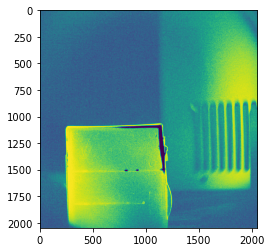

In [45]:
plt.imshow(ILP)
I11 = np.array(ILP*256,dtype='uint8')
plt.imshow(I11)
I12 = cv2.equalizeHist(I11)
plt.imshow(I12)

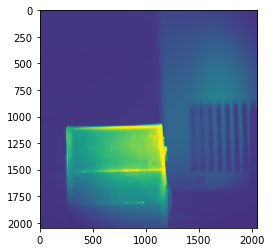

In [46]:
plt.imshow(NILP)


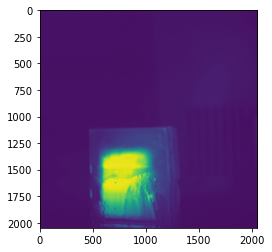

In [21]:
plt.imshow(NILP+ILP)